<img src="img/bigsem.png" width="40%" align="right">
<img src="img/logo_wiwi.png" width="20%" align="left">





<br><br><br><br>

# Dynamic Programming Models in Combinatorial Optimization
**Winter Term 2022/23**


# 1. Introduction. DP Models 

<img src="img/decision_analytics_logo.png" width="17%" align="right">


<br>

<br>
<br>

**J-Prof. Dr. Michael Römer |  Decision Analytics Group**
                                                    


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numba import njit
from typing import NamedTuple, Callable
import keyboard
from IPython.display import SVG, display, clear_output
import networkx as nx


# Overview
- Course Goals and Organization
- Combinatorial Optimization Problems and Greedy Algorithms:
  - Illustrated using 0/1 Knapsack and TSP
- From Greedy to Dynamic Programming (Models)
- Exact and Approximate Solution using Exact DP and Beam Search
- (Online) Value Function Approximation using Rollout
- Wrapping up and Outlook

## Course Goal

#### In this course, you learn
- how to model Combinatorial Cptimization problems as Dynamic Programming Models
- about various ways in which these models can be used to solve Combinatorial Optimization Problems

#### Ideally, after the course
- you are able to employ these techniques in your own research
- and have a paper draft using the techniques from this course.

## General Course Outline


#### Part 1 (starting now): Integrated Lecture / Exercise
- lecture-style content presentation from Jupyter-based slides
- Python implementation and hands-on exercises



#### Part 2: Course Projects
- a small group project related to the course topics
- ideally related to your PhD 
- presentation of the project **(Mar)** and project report / paper draft
- great opportunity for starting collaboration, we already had publications emanating from these projects

## Grading / Coursework 

#### If you do not need a grade / proof of participation, feel free to
- participate in the whole course or
- participate in the parts of the course that seem helpful to you


**BiGSEM-students** course can use this course as **elective course**:
- paper and project presentations as "ungraded academic achievement"



##  Part I: Schedule and Preliminary Contents


We will have **four blocks** of **2 x 90 h**, **Thursdays at 12:30 h** in **V10-122**


#### Block 1: Heuristics Based on DP Models
- from greedy to dynamic programming
- dynamic programming models
- exactly solving DP models using DP by reaching
- heuristically solving DP models by beam search
- approximation in value space using rollout
- relation to reinforcement learning


#### Block 2: Decision Diagrams (and DIDP)?
- exact decision diagrams from DP models
- top-down compilation
- reducing DDs
- restricted and relaxed decision diagrams
- DD-based branch and bound

#### Block 3:  DP Model-based MIPs  (I)
- solving DP Models by embedding their state-transition graphs in MIPs
- employing DD reduction for DP models in MIPs
- the power of (multi-unit) flows in state-transition graphs (state-expanded networks)


#### Block 4: DP Model-based MIPs   (II)
- state-expanded networks for representing complex constraints such as working rules
- single networks versus multiple networks
- filtering state-expanded networks using machine learning



## Course Material

- course material can be found in Moodle
- it is in form of Juypter notebooks
- attention: it also involves instance files, so
  - make sure you know how to read in files in Colab
  - or use a local installation of Python
  - or use the Binder link provided in the Lernraum

## Combinatorial optimization problems

- combinatorial optimization (CO) problems are discrete optimization problems, that is, optimization problems in which the set of feasible solutions is discrete
- well-known examples for CO problems are
  - the the travelling salesperson problem (TSP)
  - the 0/1 knapsack problem
  - the set covering problem
- many CO problems are NP-hard, that is, there no known algorithm that can solve them in polynomial time
- in this course, we will learn 
  - how (certain) CO problems can be cast as dynamic programming models
  - and how such models can be useful for solving CO problems approximately or exactly
  - in very different ways

## Greedy Approaches to Combinatorial Optimization Problems
- given that exactly solving (large) CO problems is often not (practically) tractable, one often resorts to heuristic approaches that aim at
  - finding high-quality solutions
  - in an acceptable amount of time
- one class of heuristic solutions that are usually *very* fast (but not alway yield high-quality solutions) are so-called **greedy algorithms**
- greedy algorithms solve a CO problem by construction a solution step by step
- in every step, a decision is made according to a **greedy criterion**:
  - in general, in case of different feasible options, the one that is (locally) optimal with respect to the greedy criterion is taken
   - example: the nearest neighbor algorithm for solving the TSP

## Example: the 0/1 knapsack problem

Given 
- a knapsack with a capacity $W$ 
- and a set of items, each with a weight $w_i$ and a value $p_i$
- determine the the subset of the items to put in the knapsack such that
  - the total value of the items in the knapsack is maximal and
  - the total weight of the items in the knapsack does not exceed $W$

**Example:**

<img src="./img/greedy/07.png" width="20%" align="right">

Assume you are a thief and you are about to steal the three items depicted below from an appartment. However, your backpack can only fit 35 lbs. Which items should you take?



<img src="./img/greedy/08.png" width="40%" align="left ">

## A Greedy Approach for the Knapsack Problem

- start with some item: If it (still) fits in the backpack, put it in the backpack
- repeat for the remaining items

..you never take out an item once it has been packed in the knapsack

#### In Python:

In [2]:
def greedy_knapsack(values, weights, capacity):
    solution = [] # solution array
    obj_val = 0 # accumulated objective
    total_weight = 0 # accumulated weight
    
    for i, weight in enumerate(weights): 
        if total_weight + weight <= capacity: ## if the item still fits..
            solution.append(i) ## add it and 
            total_weight+= weight # update the accumulated weight
            obj_val += values[i] # as well as the optimal objective value
    return obj_val, solution

..let us try it!

In [3]:
values = [3000,2000,1500]
weights = [30,20,15]
capacity = 35

greedy_knapsack(values, weights, capacity)

(3000, [0])

## Let us try larger instances

..there are many instance sets for the 0/1 KP
- as an example, there are some instances from D. Pisinger, see the instances folder in the repository associated with this notebook
- on the following website, you will find optimal objective function values:

http://artemisa.unicauca.edu.co/~johnyortega/instances_01_KP/

.. you find some instances in the GitHub repository in which this notebook resides
- if you download the zip with this notebook (or clone the repository), you will have them in the folder `problems/knapsack/instances`


## Format of the knapsack instances

the instance files have the following format:

- first row: `number_of_items` `capacity`
- every further row contains informatin for each item: `value` `weight`

Our toy instance would look like this:

## Reading in the instances

The following function reads an instance file

In [4]:
def read_knapsack_instance(filename):
    weights=[]
    values=[]
    with open(filename) as f: # open the file
        line = f.readline().split()  # split first row
        number_of_items = int(line[0]) # read number of items
        capacity = int(line[1]) # read capacity
        for i in range(number_of_items): # read rows for the items
            line = f.readline().split() # split row
            values.append(int(line[0])) # read value
            weights.append(int(line[1])) # read weight
    return np.array(values), np.array(weights), capacity

In [5]:
## in case you use colab:

#!pip install python-tsp
#!npx degit decision-analytics/DPModels2024/problems -f

... let us try with a 5000-item instance and solve:

In [6]:
%%time
filename = "./../problems/knapsack/instances/knapPI_1_5000_1000_1" # optimal value: 276457 
values, weights, capacity  = read_knapsack_instance(filename)

obj_value, _ = greedy_knapsack(values, weights, capacity)
print(obj_value)


33727
CPU times: user 4.54 ms, sys: 1.84 ms, total: 6.38 ms
Wall time: 15.5 ms


## Exercise: Improving the greedy approach by sorting items

- one way to improve the performance of this greedy algorithm for the knapsack problem is to sort items
- which sorting criteria do you consider promising?
- sort the items accordingly and try applying the greedy algorithm to the sorted items

#### Hint:
In numpy, there is the function `argsort` which does not return the sorted values of an array, but an array of the sorted sorted indexes!


In [7]:
values
weights
sorted_idx = np.argsort(values/weights)[::-1]
sorted_idx

array([2504,  830, 1143, ..., 1787, 4028,  633])

In [8]:
sorted_values = values[sorted_idx]
sorted_weights = weights[sorted_idx]

#filename = "./../problems/knapsack/instances/knapPI_1_5000_1000_1" # optimal value: 276457


obj_value, _ = greedy_knapsack(sorted_values, sorted_weights, capacity)
obj_value


np.int64(276379)

## The Travelling Salesperson Problem

<img src="https://pup-assets.imgix.net/onix/images/9780691163529.jpg" width="20%" align="right">


**Informal problem statement:** Given a set of cities and the distances between the cities, find a minimum-cost round-trip that visits each city exactly once.

**More formally:** Given a complete graph and distances between each pair of nodes in the graph, find a cost-minimal hamiltonian cycle in the graph


- one of the best-known combinatorial opimization problem 
- **A nice book on the TSP:**  [In Pursuit of the Traveling Salesman](https://press.princeton.edu/books/paperback/9780691163529/in-pursuit-of-the-traveling-salesman)
 - die story of the TSP presented by one of its protagonists (William Cook)
- TSP website: https://www.math.uwaterloo.ca/tsp/index.html
- there are a lot of instances
    - in particular, there is a full library of instances, the so-called [TSPLib](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/)
    - some of them are part of the git repository for the course material
    - [here](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html) you find optimal objective values for many instances

**..and there is even a Python library dedicated to solving the TSP: [`python-tsp`](https://github.com/fillipe-gsm/python-tsp)** 

## Nearest Neighbor: A greedy algorithm for the TSP

- we assume that the cities are indexed from 0 to $N-1$

Goal: create a list forming a permutation of the city indexes representing a tour with a small total distance 
- start with some node and add it to the list
- find a node that is not yet in the list and that is nearest to the most recently added node and add it to the list
- repeat until the list has length $N$

## A helper function that computes the nearest neighbor 

In [9]:
def get_nearest_neighbor(distance_matrix, permutation):
    
    # the last node in the permutation
    node = permutation[len(permutation)-1]
    
    smallest_distance = 9999999999 ## some large value
    nearest_neighbor = 0
    
    # number of nodes = dimension of the distance matrix
    for neighbor in range(len(distance_matrix)):
        
        if neighbor in permutation: continue # skip if already visited
        
        # update the nearest neighbor if needed
        if distance_matrix[node][neighbor] < smallest_distance: 
            nearest_neighbor = neighbor
            smallest_distance = distance_matrix[node][neighbor]            
       
    return nearest_neighbor, smallest_distance 

## The full algorithm in Python

In [10]:
def tsp_nearest_neighbor(distance_matrix, permutation):
    
    total_distance = 0
    
    #as long as the list is not "full"
    while len(permutation) < len(distance_matrix):
        
        node, distance = get_nearest_neighbor(distance_matrix, permutation)
        
        permutation.append(node)
        total_distance += distance
        
    total_distance += distance_matrix[permutation[len(permutation)-1], permutation[0]] # final
    return permutation, total_distance

# Let us try it:

In [11]:
distance_matrix_tiny = np.array([
    [0,  5, 4, 10],
    [5,  0, 8,  5],
    [4,  8, 0,  3],
    [10, 5, 3,  0]
])

tsp_nearest_neighbor(distance_matrix_tiny, [0])

([0, 2, 3, 1], np.int64(17))

## The Python library `python-tsp`

see: https://github.com/fillipe-gsm/python-tsp

### offers:
- functions to read TSP instances in the tsplib-format
  
  
  

In [12]:
%%time
from python_tsp.distances import tsplib_distance_matrix

f1 = "./../problems/tsp/instances/a280.tsp" # optimal solution 2579 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)
f2 = "./../problems/tsp/instances/brazil58.tsp" # optimal solution 25395 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)
f3 = "./../problems/tsp/instances/berlin52.tsp" # optimal solution  7542 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)

tsplib_file = f2

distance_matrix = tsplib_distance_matrix(tsplib_file)

permutation, distance = tsp_nearest_neighbor(distance_matrix, [0])
distance

CPU times: user 74.4 ms, sys: 13.5 ms, total: 87.9 ms
Wall time: 103 ms


np.int64(30774)

- and heuristic as well as exact TSP algorithms
  - e.g. local search, simulated annealing and dynamic programming (exact: careful, may take very long)

In [13]:
%%time
from python_tsp.heuristics import solve_tsp_local_search, solve_tsp_simulated_annealing

#permutation, distance = solve_tsp_local_search(distance_matrix)

permutation, distance = solve_tsp_simulated_annealing(distance_matrix)
distance

CPU times: user 533 ms, sys: 12.9 ms, total: 546 ms
Wall time: 587 ms


np.int64(26190)

## Improving nearest neighbor: multi-start

- one way to improve a greedy heuristic such as nearest neighbor that relies parameters (here: start city) is to call the greedy algorithm multiple times with different parameters
- in general, many greedy algorithms are so fast that calling them multiple times is a perfectly feasible approach

#### Task: Write a function that calls the nearest-neighbor algorithm for every possible start node

In [14]:
def tsp_multi_start_nearest_neighbor(distance_matrix):
    final_perm = []
    final_dist = 9999999999
    for i in range(len(distance_matrix)):
        permutation, distance = tsp_nearest_neighbor(distance_matrix, [i])
        if distance < final_dist:
            final_perm = permutation
            final_dist = distance
    return final_perm, final_dist

In [15]:
route, distance = tsp_multi_start_nearest_neighbor(distance_matrix)
print("route:", route, "\ndistance:", distance)

route: [4, 26, 42, 11, 56, 22, 23, 57, 43, 17, 0, 29, 12, 39, 24, 8, 31, 19, 52, 49, 3, 21, 7, 54, 53, 1, 40, 34, 9, 51, 50, 46, 48, 2, 47, 38, 28, 35, 16, 25, 5, 18, 27, 13, 36, 33, 45, 55, 44, 32, 14, 20, 10, 15, 37, 41, 30, 6] 
distance: 27384


Try it:

In [16]:
%%time
permutation, distance = tsp_multi_start_nearest_neighbor(distance_matrix)
distance

CPU times: user 56.9 ms, sys: 4.12 ms, total: 61 ms
Wall time: 106 ms


np.int64(27384)

Compiling just in time: add @njit in front of the function and every nested function:

In [17]:
@njit
def get_nearest_neighbor(distance_matrix, permutation):
    
    # the last node in the permutation
    node: list[int] = permutation[len(permutation)-1]
    
    smallest_distance: float = 9999999999 ## some large value
    nearest_neighbor: int = 0
    
    # number of nodes = dimension of the distance matrix
    for neighbor in range(len(distance_matrix)):
        
        if neighbor in permutation: continue # skip if already visited
        
        # update the nearest neighbor if needed
        if distance_matrix[node][neighbor] < smallest_distance: 
            nearest_neighbor = neighbor
            smallest_distance = distance_matrix[node][neighbor]            
       
    return nearest_neighbor, smallest_distance 

@njit
def tsp_nearest_neighbor(distance_matrix, permutation):
    
    total_distance: float = 0
    
    #as long as the list is not "full"
    while len(permutation) < len(distance_matrix):
        
        node, distance = get_nearest_neighbor(distance_matrix, permutation)
        
        permutation.append(node)
        total_distance += distance
        
    total_distance += distance_matrix[permutation[len(permutation)-1], permutation[0]] # final
    return permutation, total_distance

@njit
def tsp_multi_start_nearest_neighbor(distance_matrix):
    final_perm: list[int] = [1]
    final_dist: float = 9999999999
    for i in range(len(distance_matrix)):
        permutation, distance = tsp_nearest_neighbor(distance_matrix, [i])
        if distance < final_dist:
            final_perm = permutation
            final_dist = distance
    return final_perm, final_dist

In [18]:
%%time
route, distance = tsp_multi_start_nearest_neighbor(distance_matrix)
print("route:", route, "\ndistance:", distance)

route: [4, 26, 42, 11, 56, 22, 23, 57, 43, 17, 0, 29, 12, 39, 24, 8, 31, 19, 52, 49, 3, 21, 7, 54, 53, 1, 40, 34, 9, 51, 50, 46, 48, 2, 47, 38, 28, 35, 16, 25, 5, 18, 27, 13, 36, 33, 45, 55, 44, 32, 14, 20, 10, 15, 37, 41, 30, 6] 
distance: 27384
CPU times: user 460 ms, sys: 45.1 ms, total: 505 ms
Wall time: 564 ms


## Speeding up with numba

**`numba`**

-  among other things, numba allows to **just-in-time** compile Python code
- this make Python code much faster
- but it only applies to a certain subset of Python
- see https://numba.pydata.org/ for more information

- most simple approach to apply numba use the *decorators* `@njit` above the function to just-in-time compile
- let us try this out with the function `tsp_multi_start_nearest_neighbor` and re-do the timing 



# From Greedy to Dynamic Programming (Models)

## Modeling a discrete multi-stage transition system

<img src="./img/deterministic_multistage_problem.png" width="60%">



- $k$ the current step / stage (e.g. the number of cities visited so far), out of $N$ stages.
- $x_k$ the current state needed to calculate the next step and the cost
    - e.g. the cities visited visited so far and the current city
    - the start state is defined as $x_0$
- $u_k$ a decision from the set $U_k(x_k)$ of feasible decisions when being in stage $k$ and in state $x_k$ 
  - e.g. a city that was not visited so far  
- $g(x_k, u_k)$ the cost of choosing decision $u_k$ when being in state $x_k$
  - e.g. the distance to the next city
- $f(x_k, u_k)$ a transition function that computes $x_{k+1}$ from $x_k$ und the decision $u_k$ 
  - e.g. an augmentation of the cities visited so far and an update of the current city



## A dynamic programming model

A model for such a discrete system as defined on the previous slide along with the optimization problem:

$$\min_{u_0,..,u_k,..u_{N-1}} \sum_{k=0}^{N-1} g_k(x_k,u_k)$$


..will be referred to as a **dynamic programming model** in this remainder of this course, and we will refer to this generic problem as $DP$ in what follows

#### Observe:
- here, we assume a minimization problem, but it is straightforward to obtain a corresponding maximization problem
- we also assume the cost are "stage-wise"-additive (but: they can be state-dependent!)
- we assume there are no terminal costs $g(x_N)$ (would be straightforward to include)
- there can be far more general DP models, but for now we stick to classes that can be represented as displayed above


## Example: A DP model for the Knapsack Problem

Given:
- a knapsack instance with $N$ items with weights $w_k$ and profits $p_k$ (zero-indexed) and capacity $W$ 

- state $x_k$: accumulated weight after adding the first $k-1$ items, $x_0 = 0$
- decision $u_k \in \{0, 1\}$ (0: do not add item $k$ to the knapsack; 1: add item $k$)
- $U_k(x_k) = \begin{cases} 
                \{0,1\} \quad \mathrm{if} \quad x_k + w_k \leq W \\
                \{0 \} \quad \mathrm{else}
\end{cases}$
- $f(x_k, u_k) = x_k + w_k u_k $
- $g(x_k, u_k) = p_k u_k$

We have a maximization objective:

$$\max_{u_0,..,u_k,..u_{N-1}} \sum_{k=0}^{N-1} g_k(x_k,u_k)$$


## Example: A DP model for the TSP

Given:
- a TSP instance with a $N$ cities and distances $d_{i,j}$ between cities $i,j$
  - let us denote with $\mathcal{N} = \{1, \ldots N \}$ the set of cities 
  


- state $x_k$: sequence / ordered set of cities visited so far, $x_0 = i^0$ where $i^0$ is the first city
  - let us define $l(x_k)$ as the last element in the ordered set, that is, the "current" city

- decision $u_k \in \mathcal{N}$ city to visit next 
- $U_k(x_k) = \mathcal{N} \setminus x_k$
- $f(x_k, u_k) = x_k + u_k$  (here, with $+$ we mean to append $u_k$ to the sequence / ordered set $x_k$
- $g(x_k, u_k) = \begin{cases} 
                d_{l(x_k), u_k} \quad \mathrm{if} \quad k < N-1 \\
               d_{l(x_k), u_k} +  d_{u_k, i^0} \quad  \mathrm{if} \quad k = N-1
\end{cases}$

We have a minimization objective:

$$\min_{u_0,..,u_k,..u_{N-1}} \sum_{k=0}^{N-1} g_k(x_k,u_k)$$



## Representing a DP model in Python

Let us devise a Python framework for implementing a dynamic programming model.

To implement a DP model for a CO problem in this framework, we need to implement the following functions:
- a function returning the feasible decisions $U_k$ given a state $x_k$ in stage $k$ (and the data from the instance)

In [19]:
def feasible_decisions(instance, k, state):
    return

- the transition function $f(x_k, u_k)$ returning the state $x_{k+1}$ resulting from taking decision $u_k$ when being in state $x_k$

In [20]:
def transition_function(instance, k, state, decision):
    return

- the cost function

In [21]:
def cost_function(instance, k, state, decision):
    return

## Representing a DP model in Python

- we can collect these three functions in a `NamedTuple` as follows:

In [22]:
class DP(NamedTuple):
    feasible_decisions : Callable
    transition_function : Callable
    cost_function : Callable
    direction : str # 'max' or 'min'

#### States
- we are free to define our state representation
- for later purposes, it will be useful if the state variable is immutable, therefore tuples or namedtuple are useful data structures for states


#### Decisions
- in most cases in this part, we will assume that decisions are integers, but note that this is not required as long as the transition function works
- however, for now, we assume that decisions only induce a change between stages -- we will relax that requirement later in the course


#### Instance data
- all functions named above take an instance as parameter. Instance data does not have to take a certain form, it just needs to "match" the (problem-specific) functions

## Generic helper functions to deal with maximization and minimization

In [23]:
@njit 
def better(value1, value2, direction):
    if direction == "min":
        return value1 < value2
    elif direction == "max":
        return value1 > value2
    else:
        raise ValueError(f"direction {direction} not supported, must be 'min' or 'max'")


In [24]:
better(3,4,"min")


True

In [25]:
@njit
def best(collection, direction):
    if direction == "min":
        return min(collection)
    elif direction == "max":
        return max(collection)
    else:
        raise ValueError(f"direction {direction} not supported, must be 'min' or 'max'")

In [26]:
example_values = [2,8,7,1,5]

print(best(example_values,"min"))
print(best(example_values,"max"))

1
8


In [27]:
from heapq import nsmallest
from heapq import nlargest

@njit 
def nbest(n,collection, direction):
    if direction == "min":
        return nsmallest(n,collection)
    elif direction == "max":
        return nlargest(n,collection)
    else:
        raise ValueError(f"direction {direction} not supported, must be 'min' or 'max'")

In [28]:
print(nbest(2,example_values,"min"))
print(nbest(2,example_values,"max"))

[1, 2]
[8, 7]


## Example: A DP model for the Knapsack Problem

Given:
- a knapsack instance with $N$ items with weights $w_k$ and profits $p_k$ (zero-indexed) and capacity $W$ 

- state $x_k$: accumulated weight after adding the first $k-1$ items, $x_0 = 0$
- decision $u_k \in \{0, 1\}$ (0: do not add item $k$ to the knapsack; 1: add item $k$)
- $U_k(x_k) = \begin{cases} 
                \{0,1\} \quad \mathrm{if} \quad x_k + w_k \leq W \\
                \{0 \} \quad \mathrm{else}
\end{cases}$
- $f(x_k, u_k) = x_k + w_k u_k $
- $g(x_k, u_k) = p_k u_k$

We have a maximization-objective:

$$\max_{u_0,..,u_k,..u_{N-1}} \sum_{k=0}^{N-1} g_k(x_k,u_k)$$


## The Knapsack DP Model in Python

In [29]:
class  KPInstance(NamedTuple):
    values:np.array
    weights:np.array
    capacity:int
    N:int   

@njit
def feasible_decisions_kp(instance: KPInstance, k, acc_weight):    
    if acc_weight + instance.weights[k] <= instance.capacity: return [0,1]
    else: return [0]

@njit
def transition_function_kp(instance: KPInstance, k, acc_weight, put):
    return acc_weight + put*instance.weights[k]

@njit
def cost_function_kp(instance: KPInstance, k, acc_weight, put):
      return put*instance.values[k]

Putting all together, and stating that we have a maximization objective

In [30]:
dp_kp = DP(feasible_decisions_kp, transition_function_kp,  cost_function_kp, "max")

## An instance reader function for the Knapsack Problem

In [31]:

def read_kp_instance(filename, sorted=True):
    weights=[]
    values=[]
    with open(filename) as f: # open the file
        line = f.readline().split()  # split first row
        number_of_items = int(line[0]) # read number of items
        capacity = int(line[1]) # read capacity
        for i in range(number_of_items): # read rows for the items
            line = f.readline().split() # split row
            values.append(int(line[0])) # read value
            weights.append(int(line[1])) # read weight
            
    values = np.array(values)
    weights = np.array(weights)    
    
    
    if sorted:
        sorted_idx = np.argsort(-1* values/weights)
    values = values[sorted_idx]
    weights = weights[sorted_idx]
     
        
    return KPInstance(values, weights, capacity, number_of_items)



In [32]:
filename = "./../problems/knapsack/instances/knapPI_1_5000_1000_1"
# filename = "./../problems/knapsack/instances/knapPI_1_100_1000_1"
kp_instance = read_kp_instance(filename)

## Example: A DP model for the TSP

Given:
- a TSP instance with a $N$ cities and distances $d_{i,j}$ between cities $i,j$
  - let us denote with $\mathcal{N} = \{1, \ldots N \}$ the set of cities 
  


- state $x_k$: sequence / ordered set of cities visited so far, $x_0 = i^0$ where $i^0$ is the first city
  - let us define $l(x_k)$ as the last element in the ordered set, that is, the "current" city

- decision $u_k \in \mathcal{N}$ city to visit next 
- $U_k(x_k) = \mathcal{N} \setminus x_k$
- $f(x_k, u_k) = x_k + u_k$  (here, with $+$ we mean to append $u_k$ to the sequence / ordered set $x_k$
- $g(x_k, u_k) = \begin{cases} 
                d_{l(x_k), u_k} \quad \mathrm{if} \quad k < N-1 \\
               d_{l(x_k), u_k} +  d_{u_k, i^0} \quad  \mathrm{if} \quad k = N-1
\end{cases}$

We have a minimization objective:

$$\min_{u_0,..,u_k,..u_{N-1}} \sum_{k=0}^{N-1} g_k(x_k,u_k)$$



## Example: DP model for the TSP in Python

In [33]:
class TSPInstance(NamedTuple):
    distance_matrix : np.array
    N : int

@njit
def feasible_decisions_tsp(instance, k, sequence):
    return np.array([i for i in range(instance.N+1) if i not in sequence])    

@njit
def transition_function_tsp(instance, k, sequence, neighbor):
    return sequence + [neighbor]
@njit
def cost_function_tsp(instance, k, sequence, neighbor):
    
    if k < instance.N-1:
        return instance.distance_matrix[sequence[k]][neighbor]
    else:
        return instance.distance_matrix[sequence[k]][neighbor] + instance.distance_matrix[neighbor][sequence[0]]

dp_tsp = DP(feasible_decisions_tsp, transition_function_tsp,  cost_function_tsp, "min")

## An instance reader function for the TSP

In [34]:
def read_tsp_instance(filename):    
    distance_matrix = tsplib_distance_matrix(filename)
    return TSPInstance(distance_matrix, len(distance_matrix)-1)



In [35]:
tsplib_file = "./../problems/tsp/instances/brazil58.tsp" # optimal solution 25395 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)
#tsplib_file = "./../problems/tsp/instances/berlin52.tsp" # optimal solution  7542 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)

tsp_instance = read_tsp_instance(tsplib_file)


# Generic implementations of algorithms based on the generic DP model

## Generic greedy for DP models

- given a generic DP model, we can now start devising generic implementation of algorithms operating on DP models
- as an example, we can generically implement greedy as follows:

**Observe:**
- below, we avoid some loops by directly working on arrays of decisions


In [36]:
@njit
def dp_greedy(dp, instance, state_start):
    
    state = state_start
    
    solution_decisions = []
    
    total_cost = 0
    
    for k in range(instance.N):    
        
        # get feasible decisions
        decisions = dp.feasible_decisions(instance, k, state)
        
        if decisions is None or len(decisions) == 0: continue
            
        
        # create a tuple (cost, decision) for each decision
        costs_decisions =[(dp.cost_function(instance, k, state, d), d) for d in decisions]
        
        #get the best decision 
        best_cost, best_decision = best(costs_decisions, dp.direction) 
        
        #get target state
        state = dp.transition_function(instance, k, state, best_decision)

        total_cost += best_cost
        solution_decisions.append(best_decision)
        
    return total_cost, solution_decisions

## Try with both KP and TSP:

Knapsack Problem:

In [37]:
%%time
dp_greedy(dp_kp, kp_instance, 0)[0]

CPU times: user 829 ms, sys: 29.2 ms, total: 858 ms
Wall time: 869 ms


276379

TSP:

In [38]:
%%time
dp_greedy(dp_tsp, tsp_instance, [0])[0]

CPU times: user 760 ms, sys: 20.5 ms, total: 781 ms
Wall time: 822 ms


30774

## Greedy as a myopic policy 

- we will see later how to solve a $DP$ model to optimality

- in general, we refer to a function $\pi$ that maps a state $x_k$ to a decision $u_k$ as a **policy**
- in a deterministic problem, given a policy $\pi$, we can obtain a solution to $DP$ by 
  - starting from $x_k := x_0$ and selecting the $u_k$ according to the policy
  - applying the state transition $x_{k+1} = f(x_k, u_k)$
  - and continue until $k:= N -1$

Greedy as a policy:
- we can view the greedy algorithm as being based on a policy that selects a $u_k$ that minimizes the transition costs $g$:

$$u_k = \underset{u_k \in U_k(x_k)}{\operatorname{argmin}} \, g(x_k, u_k)$$

Observe: This policy is **myopic** since it does not account for how deciding for a certain $u_k$ affects the quality of the remaining solution process - hence its name: *greedy*.

## Accounting for the future: The value function 


- to quantify the future value (also called cost-to-go) of a state $x_k$, we use the so-called value function $J(x_k)$ 
  - given a state $x_k$, $J(x_k)$ represents the **optimal** cost / value obtained by solving the residual problem from stages $k$ to $N-1$.
  - the corresponding problem starting at $k$ is also referred to as the **tail subproblem**.
  
 

 
   
Given a value function, we can compute the decision to take in stage  $k$ as:

$$u_k = \underset{u_k \in U_k(x_k)}{\operatorname{argmin}} \, \Big( g(x_k, u_k) + J(f(x_k, u_k)) \Big) $$


Observe that for the greedy policy for the knapsack, $J(x_{k}) = 0$ 

## Q-values / Q-factors

- in some cases, in particular in some reinforcement learning approaches, it is convenient to use so-called Q-factors,  Q-values or Q-functions

$$Q_k(x_k, u_k) = g(x_k, u_k) + J\big( f(x_k, u_k ) \big)$$

..using these Q-factors, we can re-write the problem of selecting the next decision / control / action as:

$$u_k = \underset{u_k \in U_k(x_k)}{\operatorname{argmin}} \, Q_k(x_k, u_k) $$

## Exact and approximate value functions


#### The exact (optimal) value function
- we denote the exact / optimal value function with $J^*$.
- if we have access to $J^*$, then the greedy policy based on $g(x_k, u_k) + J(f(x_k, u_k))$ gives us an optimal solution
- the problem: $J^*$ is typically probitively hard

#### Approximate value functions

- we denote an approximate value function with $\tilde{J}$
- a greedy policy based on $\tilde{J}$ is suboptimal,  but can be much faster to compute
- approximate value functions can be determined in various ways $\tilde{J}$:
  - using offline training / learning
  - using problem simplification or aggregation (solve an approximate tail problem)
  - using online techniques (e.g. rollout), see later

## Exact Dynamic Programming

How to obtain an exact value function?

In general,  this requires exactly solving the DP model
- there are various ways to do this (backward or forward), we will consider this in somewhat more detail next week
- for large-scale COP, exactly solving the DP model usually takes probhibitively long

<img src="./img/full_tree.png" width="60%">

## Exact Dynamic Programming: An Illustration of the Knapsack Case

One approach to exactly solve a DP model is to
- create the state transition graph and
- compute the shortest (longest) path in the graph


<img src="./img/reaching_05.png" width="60%">



### Exact Dynamic Programming by Reaching: Visualization

In [39]:
    
def add_to_visualization_graph(g, k, prev_state, state, decision, cost_decision, cost_state):

    prev_node = (k,prev_state)
    node = (k+1, state)
    
    g.add_edge(prev_node,node, label= " u:" + str(decision) + "\ng(x,u):" + str(cost_decision) + "\n\n")
    g.nodes()[node]["xlabel"]= cost_state
    g.nodes()[prev_node]["label"] = prev_state
    g.nodes()[node]["label"] = state

def display_visualization_graph(g):
    clear_output()
    
    ag = nx.nx_agraph.to_agraph(g)
    ag.graph_attr["nodesep"] = 0.5
    svg = ag.draw(prog='dot',format='svg')
    display(SVG(svg))


In [40]:
def dp_by_reaching_visualized(dp, instance, start_state):
    ## for the visualization
    g = nx.MultiDiGraph()
    
    # we assume a stage-wise structure
    states_costs = [{} for k in range(0, instance.N + 1)]
    
    states_costs[0][start_state] = 0
    
    for k in range(0, instance.N):
        for state, cost in states_costs[k].items():
            for decision in dp.feasible_decisions(instance, k, state):
                next_state = dp.transition_function(instance, k, state, decision)
                next_cost = cost + dp.cost_function(instance, k, state, decision)
                
                if next_state not in states_costs[k + 1]:
                    states_costs[k + 1][next_state] = next_cost
                elif better(next_cost, states_costs[next_state], dp.direction):
                    states_costs[k + 1][next_state] = next_cost
                
                add_to_visualization_graph(g, k, state, next_state, decision, dp.cost_function(instance, k, state, decision), next_cost)
                
                input("Press a key to continue...")
                display_visualization_graph(g)
                    
    return best(list(states_costs[instance.N].values()), dp.direction)

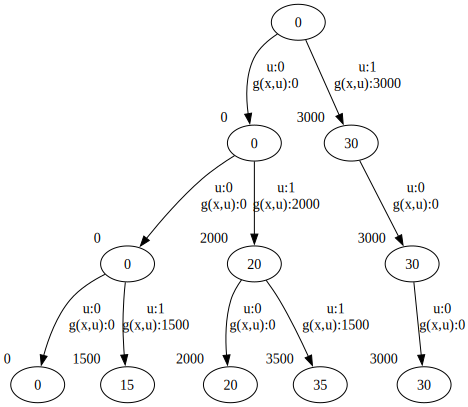

3500

In [44]:
values = [3000,2000,1500]
weights = [30,20,15]
capacity = 35
kp_instance_tiny = KPInstance(values, weights, capacity, 3)


dp_by_reaching_visualized(dp_kp, kp_instance_tiny, 0)

### Exact Dynamic Programming by Reaching: Implementation

In [57]:
def dp_by_reaching(dp, instance, start_state):
    
    # we assume a stage-wise structure
    states_costs = [{} for k in range(0,instance.N+1)]
    
    states_costs[0][start_state] = 0
    
    for k in range(instance.N): 
        
        for state, cost in states_costs[k].items():
                                               
            for decision in dp.feasible_decisions(instance, k, state):                      
                
                next_state = dp.transition_function(instance, k, state, decision)
                next_cost = cost + dp.cost_function(instance, k, state, decision)
            
                if next_state not in states_costs[k+1]:
                    states_costs[k+1][next_state] = next_cost

                elif better(next_cost, states_costs[k+1][next_state], dp.direction):
                    states_costs[k+1][next_state] = next_cost
                
    return best (list(states_costs[instance.N].values()), dp.direction)


- Question: How can we obtain the optimal solutoin (that is, the optimal sequence of decisions?


### Does it work for the TSP as well?



In [48]:
tsp_instance_tiny = TSPInstance(distance_matrix_tiny, len(distance_matrix_tiny)-1)

dp_by_reaching(dp_tsp, tsp_instance_tiny, (0,))


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<built-in function add>) found for signature:
 
 >>> add(UniTuple(int64 x 1), list(int64)<iv=None>)
 
There are 20 candidate implementations:
  - Of which 18 did not match due to:
  Overload of function 'add': File: <numerous>: Line N/A.
    With argument(s): '(UniTuple(int64 x 1), list(int64)<iv=None>)':
   No match.
  - Of which 2 did not match due to:
  Operator Overload in function 'add': File: unknown: Line unknown.
    With argument(s): '(UniTuple(int64 x 1), list(int64)<iv=None>)':
   No match for registered cases:
    * (int64, int64) -> int64
    * (int64, uint64) -> int64
    * (uint64, int64) -> int64
    * (uint64, uint64) -> uint64
    * (float32, float32) -> float32
    * (float64, float64) -> float64
    * (complex64, complex64) -> complex64
    * (complex128, complex128) -> complex128

During: typing of intrinsic-call at /var/folders/sw/gtt0d6s95dn4kt5424b0j_4m0000gp/T/ipykernel_22373/3203729159.py (11)

File "../../../../../../../var/folders/sw/gtt0d6s95dn4kt5424b0j_4m0000gp/T/ipykernel_22373/3203729159.py", line 11:
<source missing, REPL/exec in use?>


- We have to make sure that the states are immutable types - in this case, we can use tuples:

In [52]:

@njit
def transition_function_tsp_tup(instance, k, sequence, neighbor):
    return sequence + (neighbor,)

dp_tsp_tup = DP(feasible_decisions_tsp, transition_function_tsp_tup,  cost_function_tsp, "min")

In [53]:
dp_tsp_tup.transition_function(tsp_instance_tiny,0,(0,),1)

(0, 1)

In [54]:
dp_by_reaching(dp_tsp_tup, tsp_instance_tiny, (0,))

17

### DP by Reaching for the TSP with Visualization



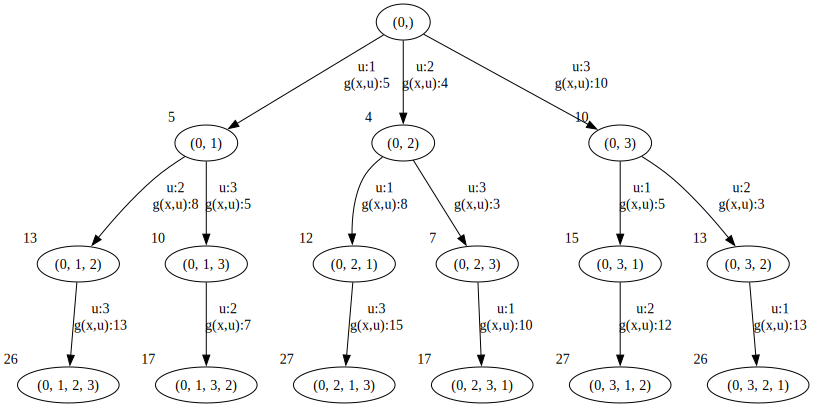

17

In [55]:
dp_by_reaching_visualized(dp_tsp_tup, tsp_instance_tiny, (0,))

### Exact Dynamic Programming by Reaching is very similar to Breadth-First Search

- in fact, we can see DP by reaching as a variant of BFS with memoization
  - that is, the same state is never expanded twice in each layer / stage

## Heuristic Search Algorithms based on DP Formulations



### Motivation

- given the fact that many CO problems are NP hard, exact DP suffers from the so-called curse of dimensionality
- on the other hand, greedy is very simplistic and may yield low-quality solutions
- one idea to improve upon greedy is to expand more that one state per layer / stage

### Beam Search
- in each stage (each layer) only expand a limited number (`beam_width`) of nodes / states 
- `beam_width=1` is a greedy algorithm
- `beam_width=∞` is the exact BFS / DP by Reaching algoritm

In [56]:
def best(collection, direction):
    if direction == "min":
        return min(collection)
    else:
        return max(collection)
     
def nbest(n,collection, direction):
    if direction == "min":
        return nsmallest(n,collection)
    else:
        return nlargest(n,collection)

In [44]:
def beam_search_visualized(dp, instance: TSPInstance, start_state, beam_width):

    ## for the visualization
    g = nx.MultiDiGraph()
    
    cost_state_tuples = [(0, start_state)]

    for k in range(0,instance.N):
        
        nbest_cost_state_tuples = nbest(beam_width, cost_state_tuples, dp.direction)
        cost_state_tuples = []
        
        for cost, state in nbest_cost_state_tuples:           
            
            for decision in dp.feasible_decisions(instance, k, state):
                
                next_state = dp.transition_function(instance, k, state, decision)
                next_cost = cost + dp.cost_function(instance, k, state, decision)
           
                cost_state_tuples.append((next_cost, next_state))

                
    return #best(cost_state_tuples, dp.direction)[0]

In [45]:
beam_width = 2
beam_search_visualized(dp_tsp, tsp_instance_tiny, [0], beam_width)

### Beam Search: Python Implementation

In [65]:
@njit
def best(collection, direction):
    if direction == "min":
        return min(collection)
    else:
        return max(collection)
@njit   
def nbest(n,collection, direction):
    if direction == "min":
        return nsmallest(n,collection)
    else:
        return nlargest(n,collection)
    
@njit
def beam_search(dp, instance, start_state, beam_width):
        
    # we assume a stage-wise structure
    
    cost_state_tuples = [(0, start_state)]

    for k in range(0,instance.N):
        
        nbest_cost_state_tuples = nbest(beam_width, cost_state_tuples, dp.direction)
        cost_state_tuples = []
        
        for cost, state in nbest_cost_state_tuples:           
            
            for decision in dp.feasible_decisions(instance, k, state):
                
                next_state = dp.transition_function(instance, k, state, decision)
                next_cost = cost + dp.cost_function(instance, k, state, decision)
          #  
                cost_state_tuples.append((next_cost, next_state))

                
    return best(cost_state_tuples, dp.direction)[0]

In [66]:
beam_search(dp_kp, kp_instance_tiny, 0, 1)

3000

In [67]:
beam_search(dp_tsp, tsp_instance, [0],1)

30774

# Approximate value functions / approximation in value space

## Exact and approximate value functions


#### The exact (optimal) value function
- we denote the exact / optimal value function with $J^*$.
- if we have access to $J^*$, then the greedy policy based on $g(x_k, u_k) + J(f(x_k, u_k))$ gives us an optimal solution
- the problem: $J^*$ is typically probitively hard

#### Approximate value functions

- we denote an approximate value function with $\tilde{J}$
- a greedy policy based on $\tilde{J}$ is suboptimal,  but can be much faster to compute
- approximate value functions can be determined in various ways $\tilde{J}$:
  - using offline training / learning
  - using problem simplification or aggregation (solve an approximate tail problem)
  - using online techniques (e.g. rollout), see later

### How can we obtain an approximate value function?

#### Offline value function approximation

- training machine learning models using given solutions obtained from
  - exact or heuristic solution approaches
  - of "self-generated solutions" obtained using reinforcement learning methods


#### Online value function approximation

- instead of training a model, one obtains $\tilde{J}$ by heuristically solving the tail subproblem using
  - so-called rollout with a base heuristic
  - possibly combined with so-called multi-step lookahead
- this is what we will discuss now.

## Online approximation in value space

We will consider the following approaches now:
- rollout with greedy as base heuristic
- simplified rollout
- (simplified) multi-step lookahead with rollout 



## Optimal and approximate value functions


#### The optimal (exact) value function
- we denote the exact / optimal value function with $J^*$.
- if we have access to $J^*$, then the greedy policy based on $g(x_k, u_k) + J(f(x_k, u_k))$ gives us an optimal solution
- the problem: $J^*$ is typically probitively hard

#### Approximate value functions

- we denote an approximate value function with $\tilde{J}$
- a greedy policy based on $\tilde{J}$ is suboptimal,  but can be much faster to compute
- approximate value functions can be determined in various ways $\tilde{J}$:
  - using offline training / learning
  - using problem simplification or aggregation (solve an approximate tail problem)
  - using online techniques (e.g. rollout), see later

## Generic Rollout with a Base Heuristic

- recall that given an approximate value function $\tilde{J}$, we can construct a policy that takes the decision according to the best approximate $Q-$-value $\tilde{Q}_k(x_k, u_k)$

$$u_k = \underset{u_k \in U_k(x_k)}{\operatorname{argmin}} \, \tilde{Q}_k(x_k, u_k) = \underset{u_k \in U_k(x_k)}{\operatorname{argmin}} \, \Big( g(x_k, u_k) +  \tilde{J}(f(x_k, u_k)) \Big) $$
  
  
- key idea of rollout:  run a (simple and fast) base heuristic on the tail subproblem starting from $x_{k+1} = f(x_k, u_k)$ to obtain a cost / value $H(f(x_k, u_k))$, and use that value as value function approximation:
  - $\tilde{J}(x_{k+1}) = H (x_{k+1})$


<img src="./img/rollout_general.png" width="60%">

## Preparing the Greedy base heuristic

- we modify the greedy algorithm such that it can start in any stage 



In [68]:
@njit
def dp_greedy_from_stage(dp, instance, state_start, from_k):
    
    state = state_start
    
    solution_decisions = []
    
    total_cost = 0
    
    for k in range(from_k, instance.N):    
        
        # get feasible decisions
        decisions = dp.feasible_decisions(instance, k, state)
        
        if decisions is None: continue
        
        # create a tuple (cost, decision) for each decision
        costs_decisions =[(dp.cost_function(instance, k, state, d), d) for d in decisions]
        
        #get the best decision 
        best_cost, best_decision = best(costs_decisions, dp.direction) 


        state = dp.transition_function(instance, k, state, best_decision)

        total_cost += best_cost
        solution_decisions.append(best_decision)
        
    return solution_decisions, total_cost

## Generic rollout with greedy base heuristic in Python
- given that we have a generic greedy, we can also implement a generic rollout algorithm
- we first write a function that gives us a q-value using rollout for approximating the cost-to go:

In [69]:
@njit
def get_q_value_rollout(dp, instance, k, state, decision):
    
    # one-step cost (function g):
    cost = dp.cost_function(instance,k, state, decision)
    
    # compute next state
    next_state = dp.transition_function(instance, k, state, decision)
    
    # compute cost to go via rollout
    cost_to_go = dp_greedy_from_stage(dp, instance, next_state, k+1)[1]
    
    return cost + cost_to_go


In [70]:
get_q_value_rollout(dp_kp, kp_instance, 2, 1, 1)

275079



## Generic rollout with greedy base heuristic in Python
- now the main function
- observe: by using `@njit(parallel=True)`, numba will try parallelzing the list comprehension involving the dp_greedy call

In [105]:
@njit(parallel=True)
def dp_rollout(dp, instance, state_start):
    
    state = state_start
    
    total_cost = 0
    
    for k in range(0, instance.N):    
         
        decisions = dp.feasible_decisions(instance, k, state)    
        
        if decisions is None: continue
        
        # create a tuple (cost, decision) for each decision
        q_values_decisions = [ (get_q_value_rollout(dp, instance, k, state, d), d) for d in decisions]
       

        #get the best decision 
        _, best_decision = best(q_values_decisions, dp.direction) 
        
        total_cost += dp.cost_function(instance, k, state, best_decision)
        state = dp.transition_function(instance, k, state, best_decision)
        
    return total_cost


In [106]:
%%time
dp_rollout(dp_kp, kp_instance,0)

/Users/ngastzepeda/sciebo - Gast Zepeda, Nayeli (ngastzepeda@uni-bielefeld.de)@uni-bielefeld.sciebo.de/BiGSEM Courses/Dynamic Programming 2025/DPModels2024-main/.venv/lib/python3.12/site-packages/numba/core/typed_passes.py:336: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../../../../../../../var/folders/sw/gtt0d6s95dn4kt5424b0j_4m0000gp/T/ipykernel_22373/3395650793.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaPerformanceWarning(msg,


CPU times: user 6.58 s, sys: 87 ms, total: 6.67 s
Wall time: 6.81 s


276422

In [107]:
%%time
dp_rollout(dp_tsp, tsp_instance,[3])

/Users/ngastzepeda/sciebo - Gast Zepeda, Nayeli (ngastzepeda@uni-bielefeld.de)@uni-bielefeld.sciebo.de/BiGSEM Courses/Dynamic Programming 2025/DPModels2024-main/.venv/lib/python3.12/site-packages/numba/core/typed_passes.py:336: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../../../../../../../var/folders/sw/gtt0d6s95dn4kt5424b0j_4m0000gp/T/ipykernel_22373/3395650793.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaPerformanceWarning(msg,


CPU times: user 477 ms, sys: 16.7 ms, total: 494 ms
Wall time: 538 ms


26852

## Rollout: Some comments


- applying rollout is always at least as good as running only the base heuristic
  - (as long as certain very natural conditions are satisified)
- the base heuristic is not restricted to greedy heuristics, but may also involve
  - ML-based policies, e.g. policies resulting from applying a "policy (neural) network"
  - multiple different base heuristics
- given that our policy involves one "exact" step before running the rollout, we call this aproach one-step lookahead minimization with rollout
- one-step lookahead minimization also works with other value function approximations (e.g. those obtained from offline training)


## Approximate one-step minimization: Simplified rollout


- applying to every decision may take a lot of time
- this will be even more true for multi-step lookahead


- in order to speed up the solution process, we can approximate the minimization step by not considering every single $u_k \in U_k(x_k)$ but only the "most promising"
  - as an example, we can use the greedy criterion $g(x_k,u_k)$ as criterion for restricting the decisions to consider.
  




In [108]:
@njit
def dp_simplified_rollout(dp, instance, state_start, n_candidates):
    
    state = state_start
    
    total_cost = 0
    
    for k in range(0, instance.N):    
         
        decisions = dp.feasible_decisions(instance, k, state) 
        
        if decisions is None: continue        
        
        costs_decisions = [(dp.cost_function(instance, k, state, d), d) for d in decisions]
      
        ## take only the best decisions!!
        best_costs_decisions = nbest(n_candidates, costs_decisions, dp.direction)        
 
        # create a tuple (cost, decision) for each decision
        q_values_decisions = [ (get_q_value_rollout(dp, instance, k, state, d), d) for (c,d) in best_costs_decisions]
       

        #get the best decision 
        best_q_value, best_decision = best(q_values_decisions, dp.direction) 
        
        state = dp.transition_function(instance, k, state, best_decision)

        total_cost += dp.cost_function(instance, k, state, best_decision)
        
    return total_cost


In [109]:
%%time
dp_simplified_rollout(dp_kp, kp_instance, 0,10)

CPU times: user 7.4 s, sys: 60.1 ms, total: 7.46 s
Wall time: 7.52 s


276422

In [110]:
%%time
dp_simplified_rollout(dp_tsp, tsp_instance,[3],10)

CPU times: user 762 ms, sys: 16.3 ms, total: 778 ms
Wall time: 828 ms


26872

## Informed Beam Search with Rollout

- we also use rollout in combination with Beam Search (How?)
- this type of search called informed search, and rollout can be used as a "heuristic function" (in the sense of tree search)
- note that a very famous variant of informed search is A* search where the "heuristic function" provides a relaxation (and thus is an admissible heuristic

**Excercise:** Implement an informed Beam Search using Rollout as heuristic function


## Multi-step lookahead

- in (exact) dynamic programming (by reaching), we (somewhat) construct a full state-transition graph
- in rollout, in each iteration, only the first step is "exact", the rest of the graph is approximated
- in multi-step lookahead, we partially expand the tree for (more than one stage) to have more "exact" steps before using a value function approximation for selection
- below: multi-step lookahead with rollout for value function approximation

<img src="./img/multistep_lookahead.png" width="60%">

#### Very important:
- at each step $k$, only a single $u_k$ is selected - all the computations of the $u_{k+1}$ are only performed to get a better $\tilde{J}$!

## Simplified Multi-step lookahead: An Implementation

In [111]:
@njit
def dp_simplified_multi_stage_lookahead_rollout(dp, instance, k_start, state_start, n_candidates, n_lookahead_steps = 1):
    
    state = state_start
    
    total_cost = 0
    
    for k in range(k_start, instance.N):    
         
        decisions = dp.feasible_decisions(instance, k, state) 
        
        if decisions is None: continue
        
        
        costs_decisions = [(dp.cost_function(instance, k, state, d), d) for d in decisions]
        
        best_costs_decisions = nbest(n_candidates, costs_decisions, dp.direction)
        
 
        # create a tuple (cost, decision) for each decision
    
        q_values_decisions = [ (get_q_value_multi_step_lookahead_rollout(dp, instance, k, state, d, n_candidates, n_lookahead_steps), d) for (c,d) in best_costs_decisions]
       


        #get the best decision 
        best_q_value, best_decision = best(q_values_decisions, dp.direction) 
        
        state = dp.transition_function(instance, k, state, best_decision)

        total_cost += dp.cost_function(instance, k, state, best_decision)
        
    return state, total_cost


## Simplified Multi-step lookahead: An Implementation (II)

In [112]:
@njit
def get_q_value_multi_step_lookahead_rollout(dp, instance, k, state, decision, n_candidates, n_lookahead_steps):
    
    # one-step cost (function g):
    cost = dp.cost_function(instance,k, state, decision)
    
    if n_lookahead_steps == 0:
        return cost
    
    # compute next state
    next_state = dp.transition_function(instance, k, state, decision)
    
    if n_lookahead_steps == 1:
    # compute cost to go via rollout
        cost_to_go = dp_greedy_from_stage(dp, instance, next_state, k+1)[1]
    else:
        cost_to_go = dp_simplified_multi_stage_lookahead_rollout(dp, instance, k+1, next_state, n_candidates, n_lookahead_steps - 1)[1]
    
    return cost + cost_to_go


In [116]:
%%time
dp_simplified_multi_stage_lookahead_rollout(dp_tsp, tsp_instance, 0, [0], 6, 3)[1]

CPU times: user 3min 36s, sys: 1.11 s, total: 3min 37s
Wall time: 3min 37s


26531

# Wrapping up and Outlook

## Approximation in policy space

- so far, we discussed approximation in value space (approximating the value function $J$)
- we then always used a policy by doing one-step lookahead minimization using the approximate value function $\tilde{J}$:
 
 $$u_k = \underset{u_k \in U_k}{\operatorname{argmin}} \, g(x_k, u_k) + \tilde{J}(x_{k+1})$$

- however, it is also possible approximate policies $\pi$ that directly give us a decision (without that minimization):

$$u_k = \pi(x_k)$$

As an example, such an approximate $\pi$ can be obtained via offline training:
- optimizing a parameterized policy function (e.g. a linear decision rule)
- in case of discrete decisions: training / learning a classification model based on given policies or by reinforcement learning (self-learning)




**Observe:** 

- a (learned) approximate policy can be used as a base policy for a rollout algorithm
- an offline learned policy can often be substantially improved by including some lookahead and rollout steps ("online play" in games)

## Simplified AlphaZero architecture as an example for a hybrid approach

<img src="./img/alpha_zero_sketch.png" width="60%">

- "Position evaluator" is a value function approximation
- rollout is not fully performed but truncated; at the end of the rollout, an approximate value function is used to account for the future value

## References / Going deeper

<img src="./img/lessons_az.jpg" width="20%" align="right">

- much of the notation and most figures are taken from presentations and books from D. Bertsekas
- Bertsekas has many books, his most recent one (see on the right) is available for free
- he also has a couple of lectures and courses available online
- you can find links to all his materials on his website https://www.mit.edu/~dimitrib/home.html
  - in particular in the section http://web.mit.edu/dimitrib/www/RLbook.html



## Conclusions and Outlook


#### This week, we...
- got used to the concept of a DP model and dynamic programming
- learned how to use simple greedy heuristics to derive relatively powerful heuristic solutions approaches
- maybe got a first or different perspective on the relation of DP and reinforcement learning

#### Next week, we...
- will have a closer look at exact approaches for solving DP models
- will discuss so-called Decision Diagrams which
  - provide an exact tecnnique for reducing the state-transition graph of a DP model
  - provide a generic mechanism for obtaining combinatorial relaxations from DP models
  - and, building on that, allow constructing an interesting Branch-and-Bound scheme that does not rely on LP relaxations